Nota para el lector: las imágenes utilizadas para realizar este proyecto fueron tomadas de Google Images utilizando la extensión "Download All Images"

Note to the reader: the images used for this project were taken from Google Images using the extension "Download All Images"

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1: Load data properly and iterate it

In [ ]:
 # Upgrade pip to the latest version
!pip install --upgrade pip

# Install or upgrade TensorFlow
!pip install --upgrade tensorflow
#Seems like this basically also installed the



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 89.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 111.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 31.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [ ]:
import cv2
import imghdr
print(cv2.__version__ )
import matplotlib.pyplot as plt


4.8.0


In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')


In [ ]:
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
data_dir ='/content/drive/MyDrive/Mis estudios /ML/Image Classifier'

In [ ]:
os.listdir(os.path.join(data_dir, 'happy'))   # Nos muestra todas las imágenas de, en este caso, 'happy'

['1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 'image7.jpeg',
 'image28.jpeg',
 'image32.jpeg',
 'image6.jpeg',
 'image22.jpeg',
 'image16.jpeg',
 'image21.jpeg',
 'image30.jpeg',
 'image15.jpeg',
 'image31.jpeg',
 'image17.jpeg',
 'image33.jpeg',
 'image18.jpeg',
 'Happy.jpg',
 'jumping_for_joy_for_3_kinds_of_happy_people.jpg',
 '1000_F_92779680_7PYCRBU7rO9sJtBb5CGcNvsRAQfecrua.jpg',
 '1000_F_176864699_2rY3V6rmOJ2EexazQGd1NnOnCherr6Sk.jpg',
 '_happy_jumping_on_beach-40815.jpg',
 '960x0.jpg',
 'o-HAPPY-facebook.jpg',
 'Travis-Bradberry-Happy.jpg',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 'Happy_guy.jpg',
 '1000_F_257759165_m9yldegJvu8gPi8lOHDM0mwP8LejhmKK.jpg',
 '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg',
 'happy-woman-in-nature-at-sunset.jpg',
 'maxresdefault2.jpg',
 'maxresdefault.jpg',
 'flexible.jpg',
 'A_Sep20_14_1189155141.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.j

In [ ]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir): #Nos muestra cada clase que nombramos (son los nombres de las carpetas)
  print(image_class)

sad
sad_test
happy


In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)): #(data, happyORsad)
    print(image)

1000_F_58495935_Nr9VzQljLyN3RKKhGDGxQDBEkqIeLzrZ.jpg
1000_F_584080922_GDrrJBOpwC2AOvbDIdPfPcxEF0RrTRgk.jpg
sad-people-vector-26812552.jpg
portrait-young-man-lonely-boring-sad-people-B2GTFD.jpg
image31.jpeg
1000_F_192160478_RlRxBbVTnBFDFJJl4xeXEKGRaGuWNSbf.jpg
1000_F_127508805_RlWmvDSE5FE4TPc53k4ld0NryWxeLsad.jpg
image32.jpeg
1000_F_124527256_XeXO1Q7xiE39ZcnuCOHTCotlj7p1FYwc.jpg
isolated-silhouette-sad-people-vector-33355448.jpg
sadness.jpg
image33.jpeg
image30.jpeg
na-oportunidad-viste-informalmente-aislado-sobre-pared-amarilla_273609-37534.jpg
do-you-cry-easily.jpg
360_F_601507482_RbV0Vk2KSg72LkjkSZBJNpmxu6Y4Hdzw.jpg
960x0.jpg
2197018.jpg
iStock_000001932580XSmall_-_abcdef_-_8bf2913309d5e5dcf7edbeb9a8f606c5cffd176b.jpg
kisspng-microphone-finger-shoulder-5d2edf40749772.9128578915633528964776.jpg
maxresdefault.jpg
sad-wise-woman-at-window.jpg
8acfbf3f9000ff5e223f432c4a784933.554x554x1.jpg
5360f7e3f9a01bb1aa10654514442436.500x500x1.jpg
depressed-man-standing-rain_23-2150761516.jpg
getty_

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
        print('Issue with image {}'.format(image_path))

In [ ]:
cv2.imread(os.path.join('/content/drive/MyDrive/Mis estudios /ML/Image Classifier/happy/05-12-21-happy-people.jpg'))

array([[[216, 215, 217],
        [216, 215, 217],
        [216, 215, 217],
        ...,
        [241, 238, 240],
        [241, 238, 240],
        [241, 238, 240]],

       [[216, 215, 217],
        [216, 215, 217],
        [216, 215, 217],
        ...,
        [241, 238, 240],
        [241, 238, 240],
        [241, 238, 240]],

       [[216, 215, 217],
        [216, 215, 217],
        [216, 215, 217],
        ...,
        [241, 238, 240],
        [241, 238, 240],
        [241, 238, 240]],

       ...,

       [[157, 131,  84],
        [165, 139,  92],
        [172, 148, 102],
        ...,
        [191, 189, 181],
        [191, 189, 181],
        [191, 189, 181]],

       [[162, 136,  89],
        [170, 144,  97],
        [177, 153, 107],
        ...,
        [191, 189, 181],
        [191, 189, 181],
        [191, 189, 181]],

       [[159, 133,  86],
        [169, 143,  96],
        [178, 154, 108],
        ...,
        [191, 189, 181],
        [191, 189, 181],
        [191, 189, 181]]

In [ ]:
img = cv2.imread(os.path.join('/content/drive/MyDrive/Mis estudios /ML/Image Classifier/happy/05-12-21-happy-people.jpg'))
print(type(img))
print(img.shape)  #Height: 880 pixels  Wide: 1400 pixels  #3 channels, which mean it's a color image

<class 'numpy.ndarray'>
(880, 1400, 3)


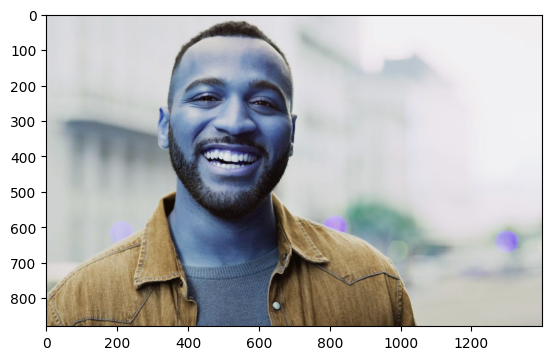

In [ ]:
plt.imshow(img)
plt.show()

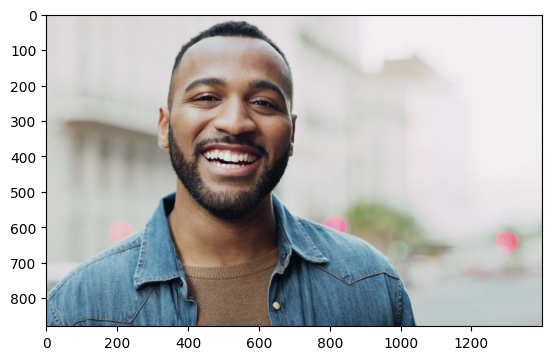

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGRA2RGB))
plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

Creating a dataset of images from an image directory in our device

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Mis estudios /ML/Image Classifier', shuffle=True)

Found 168 files belonging to 3 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7b3a1406cca0>)

In [ ]:
batch = data_iterator.next()

In [ ]:
len(batch)

2

1. Respuesta a la primera 'Duda' de la lista al principio de este notebook

In [ ]:
batch[0].shape #

(32, 256, 256, 3)

In [ ]:
#Class 1 = Sad
#Class 0 = Happy
batch[1]

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int32)

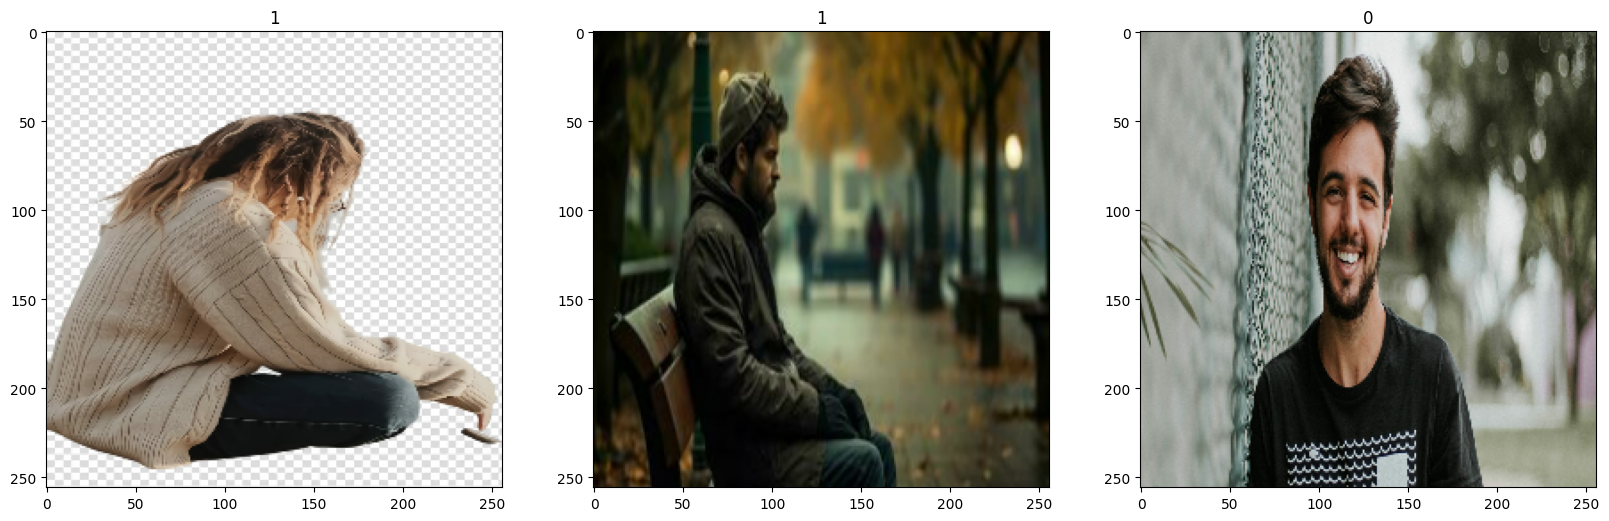

In [ ]:
fig, ax = plt.subplots(ncols = 3, figsize = (20,28) )
for idx, img in enumerate(batch[0][:3]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])


# 2: Preprocess

Scale the data: dividing it by the MAX

In [ ]:
data = data.map(lambda x,y: (x/255,y))


In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
scaled_iterator.next()

(array([[[[0.01960784, 0.18039216, 0.38431373],
          [0.02352941, 0.18431373, 0.3882353 ],
          [0.02328431, 0.19191177, 0.3997549 ],
          ...,
          [0.07965686, 0.27965686, 0.49534315],
          [0.07132353, 0.27132353, 0.4870098 ],
          [0.0628619 , 0.2628619 , 0.47854817]],
 
         [[0.02129289, 0.1820772 , 0.3859988 ],
          [0.02384536, 0.18462968, 0.38855124],
          [0.02720588, 0.19583334, 0.40367648],
          ...,
          [0.08204082, 0.28204083, 0.4977271 ],
          [0.0766142 , 0.2766142 , 0.49230048],
          [0.06677198, 0.26677197, 0.48245826]],
 
         [[0.02352941, 0.18431373, 0.3882353 ],
          [0.02352941, 0.19215687, 0.39215687],
          [0.02720588, 0.19583334, 0.40367648],
          ...,
          [0.08900122, 0.28900123, 0.5046875 ],
          [0.08066789, 0.2806679 , 0.49635416],
          [0.07233456, 0.27233455, 0.48802084]],
 
         ...,
 
         [[0.00557407, 0.05263289, 0.10753485],
          [0.00812

In [ ]:
scaled_iterator.next()[0].min()

0.0

In [ ]:
scaled_iterator.next()[0].max()

1.0

In [ ]:
batch = scaled_iterator.next()
batch

(array([[[[3.78064990e-01, 3.70221853e-01, 3.89829695e-01],
          [3.76470596e-01, 3.68627459e-01, 3.88235301e-01],
          [3.74929696e-01, 3.67086560e-01, 3.86694402e-01],
          ...,
          [3.92156886e-03, 1.17647061e-02, 0.00000000e+00],
          [3.92156886e-03, 1.17647061e-02, 0.00000000e+00],
          [3.92156886e-03, 1.17647061e-02, 0.00000000e+00]],
 
         [[3.76470596e-01, 3.68627459e-01, 3.88235301e-01],
          [3.76470596e-01, 3.68627459e-01, 3.88235301e-01],
          [3.73050392e-01, 3.65207255e-01, 3.84815097e-01],
          ...,
          [3.92156886e-03, 1.17647061e-02, 0.00000000e+00],
          [3.92156886e-03, 1.17647061e-02, 0.00000000e+00],
          [3.92156886e-03, 1.17647061e-02, 0.00000000e+00]],
 
         [[3.83339614e-01, 3.63731772e-01, 3.87261182e-01],
          [3.83819997e-01, 3.64212155e-01, 3.87741566e-01],
          [3.76976103e-01, 3.62492353e-01, 3.84313732e-01],
          ...,
          [3.92156886e-03, 1.17647061e-02, 0.0000

In [ ]:
batch[0].max()

1.0

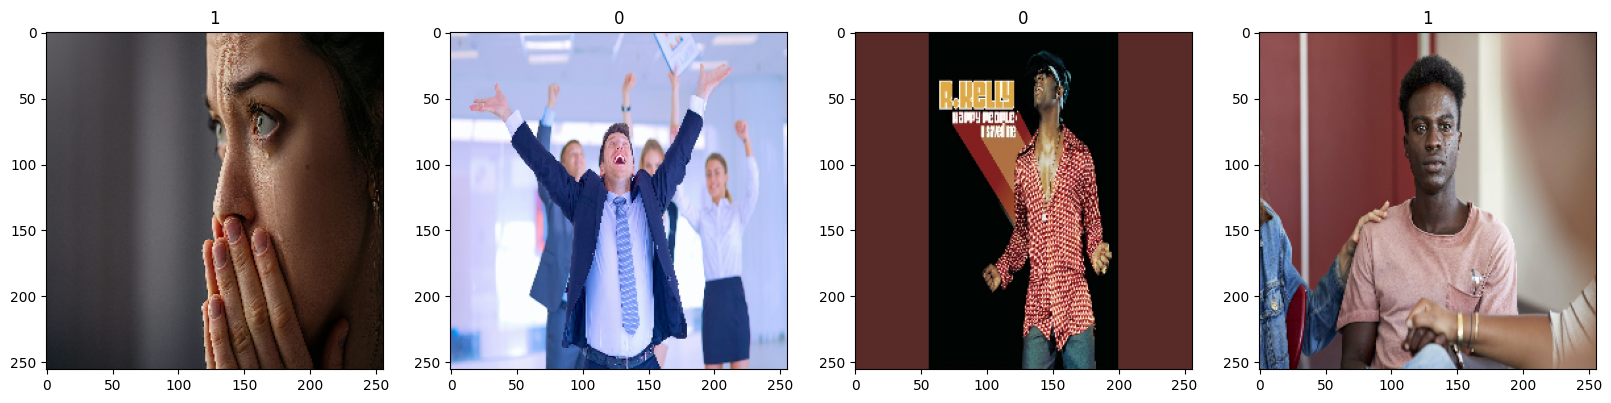

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20) )
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

  #0 = happy
  #1 = sad

## 2.2 Split Data

In [ ]:
len(data)

6

In [ ]:
train_size = int(len(data)*.65)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1


In [ ]:
print(train_size,  "batches")
print(val_size, 'batches')
print(test_size, 'batches')

3 batches
2 batches
1 batches


In [ ]:
train = data.take(train_size)
val =   data.skip(train_size).take(val_size)
#data.skip(train_size): This part skips the first train_size elements of the data dataset. Essentially, it discards the portion already used for the training set.
test =  data.skip(train_size + val_size).take(test_size)

In [ ]:
print(len(train),  "batches")
print(len(val), 'batches')
print(len(test), 'batches')

3 batches
2 batches
1 batches


#  3. Deep Model

## 3.1 Build Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
            #(NumOfFilters, SizeOfFilter, Stride, Activation, input_shape)
model.add(Conv2D(16, (3,3),1, activation='relu', input_shape = (256,256,3) ,))
model.add(MaxPooling2D())


model.add(Conv2D(32, (3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation= 'relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 3.2 Train

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir)

In [ ]:
hist = model.fit(train, epochs = 20, validation_data= val, callbacks=[tensorboard_callback], verbose= 2)

Epoch 1/20
3/3 - 19s - 6s/step - accuracy: 0.4688 - loss: 0.8992 - val_accuracy: 0.5781 - val_loss: 0.7096
Epoch 2/20
3/3 - 6s - 2s/step - accuracy: 0.5625 - loss: 0.6552 - val_accuracy: 0.4688 - val_loss: 0.6752
Epoch 3/20
3/3 - 6s - 2s/step - accuracy: 0.6042 - loss: 0.5792 - val_accuracy: 0.6250 - val_loss: 0.5681
Epoch 4/20
3/3 - 3s - 954ms/step - accuracy: 0.5208 - loss: 0.6552 - val_accuracy: 0.5312 - val_loss: 0.6428
Epoch 5/20
3/3 - 6s - 2s/step - accuracy: 0.6771 - loss: 0.5765 - val_accuracy: 0.6875 - val_loss: 0.6183
Epoch 6/20
3/3 - 3s - 924ms/step - accuracy: 0.7292 - loss: 0.5937 - val_accuracy: 0.8125 - val_loss: 0.5661
Epoch 7/20
3/3 - 3s - 1s/step - accuracy: 0.8646 - loss: 0.5274 - val_accuracy: 0.8281 - val_loss: 0.4895
Epoch 8/20
3/3 - 7s - 2s/step - accuracy: 0.7917 - loss: 0.4542 - val_accuracy: 0.7031 - val_loss: 0.4686
Epoch 9/20
3/3 - 3s - 1s/step - accuracy: 0.8333 - loss: 0.3988 - val_accuracy: 0.8438 - val_loss: 0.3543
Epoch 10/20
3/3 - 3s - 1s/step - accura

## 3.3 Plot performance

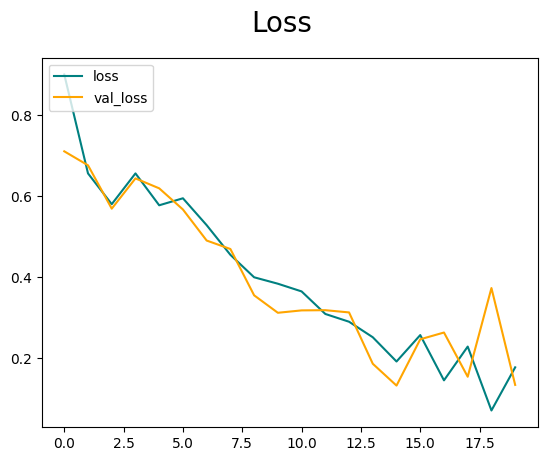

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

1:08:00

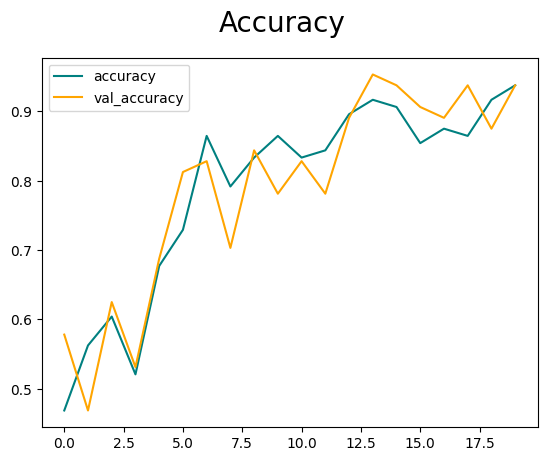

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

# 4. Evaluate the model's performance

## 4.1 Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.800000011920929, Recall: 1.0, Accuracy: 0.875


## 4.2. Test

In [ ]:
import cv2

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Mis estudios /ML/Image Classifier/sad_test/bad_mood.jpg')

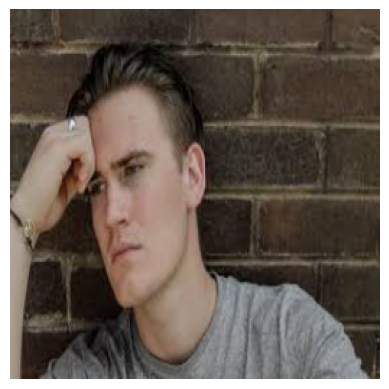

In [ ]:
#Converting the image definitely to an RGB so it can be used in the resized
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img_rgb, (256, 256)) #Resizing so it can be pass to the model
plt.imshow(resize.numpy().astype(int))
plt.axis('off')  # Hide axes for better visualization
plt.show()

In [ ]:
# NN expects a batch of images, not a single image, so we encapsulate it inside something else
np.expand_dims(resize, 0)

array([[[[ 73.03711 ,  65.03711 ,  54.03711 ],
         [ 73.88867 ,  65.88867 ,  54.88867 ],
         [ 72.25781 ,  64.25781 ,  53.257812],
         ...,
         [ 92.25781 ,  71.      ,  57.      ],
         [ 93.      ,  71.88867 ,  55.222656],
         [ 93.      ,  72.      ,  55.      ]],

        [[ 76.93678 ,  68.93678 ,  57.936787],
         [ 74.778366,  66.778366,  55.778366],
         [ 71.325645,  63.325645,  52.325645],
         ...,
         [ 92.25781 ,  71.      ,  57.      ],
         [ 93.      ,  71.88867 ,  55.222656],
         [ 93.      ,  72.      ,  55.      ]],

        [[ 81.23384 ,  73.23384 ,  62.233837],
         [ 75.37943 ,  67.37943 ,  56.379433],
         [ 70.16123 ,  62.161232,  51.161232],
         ...,
         [ 91.9707  ,  70.71289 ,  56.71289 ],
         [ 92.71289 ,  71.34642 ,  55.44584 ],
         [ 92.71289 ,  71.42578 ,  55.28711 ]],

        ...,

        [[168.85156 , 156.85156 , 140.85156 ],
         [164.55469 , 152.55469 , 136.55469 ]

In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0)) #We're scaling it here

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


In [ ]:
yhat

array([[0.95663095]], dtype=float32)

In [ ]:
if yhat > 0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')


Predicted class is Sad


# 5. Save the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models', 'ImageClassifier.h5'))

In [ ]:
new_model = load_model(os.path.join('/content/models/ImageClassifier.h5'))

In [ ]:
type(new_model)

keras.src.models.sequential.Sequential

In [ ]:
yhat = new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


In [ ]:
if yhat > 0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')
#This means we have succeeded

Predicted class is Sad
